In [1]:
from shape_by_transparency import fill_shape, rounded_corners_img, circle_img, symm_triangle_img, random_triangle_img, diamond_img, random_shape_img

image_path = "C:/Users/trent/OneDrive/Documents/GitHub/ai_art_creation/ai_art_creation/image_processing/images_raw/2023-03-23_21-11-39.png"

image_path

#rounded_corners_img(image_path=image_path)

ImportError: cannot import name 'symm_triangle_img' from 'shape_by_transparency' (c:\Users\trent\OneDrive\Documents\GitHub\ai_art_creation\ai_art_creation\image_processing\shape_by_transparency.py)

In [17]:
circle_img(image_path=image_path)

TypeError: rectangle() got an unexpected keyword argument 'joint'

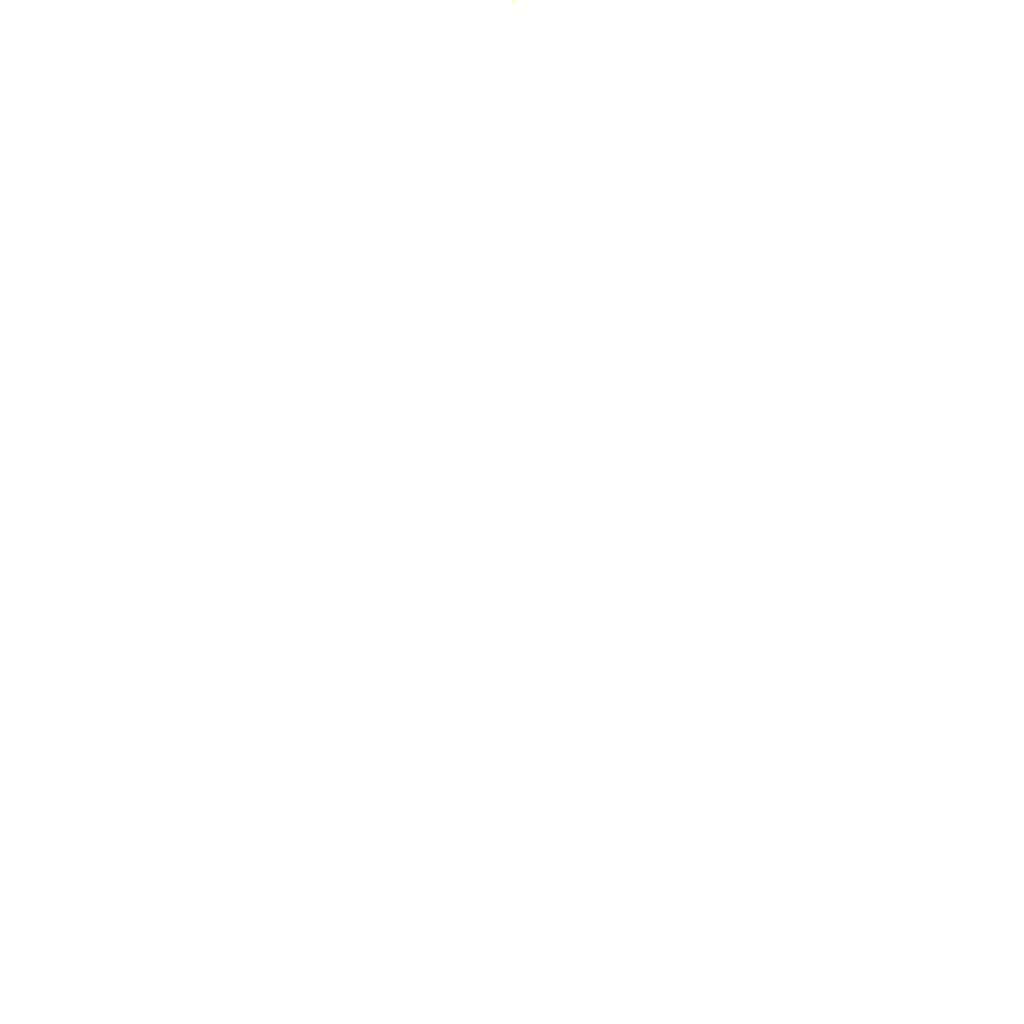

In [2]:
symm_triangle_img(image_path=image_path)

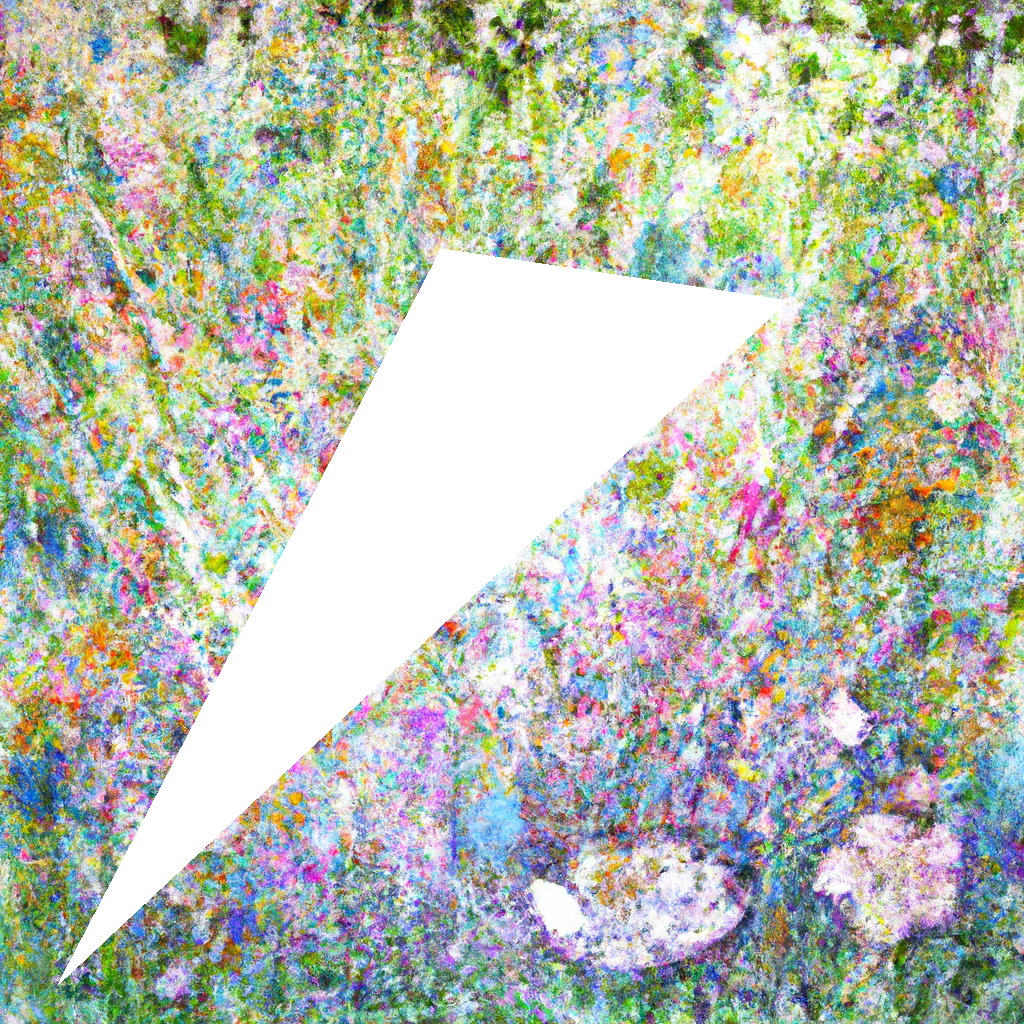

In [7]:
random_triangle_img(image_path=image_path)

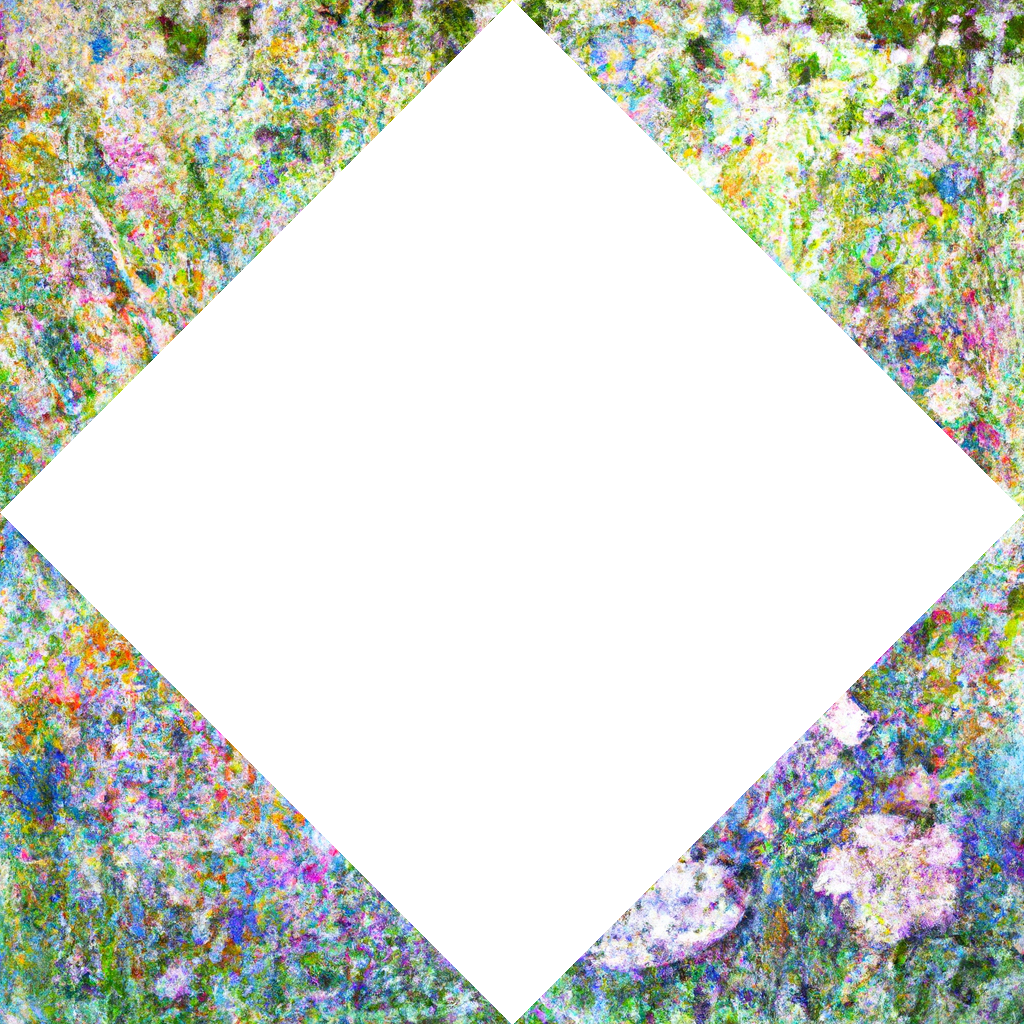

In [9]:
diamond_img(image_path=image_path)

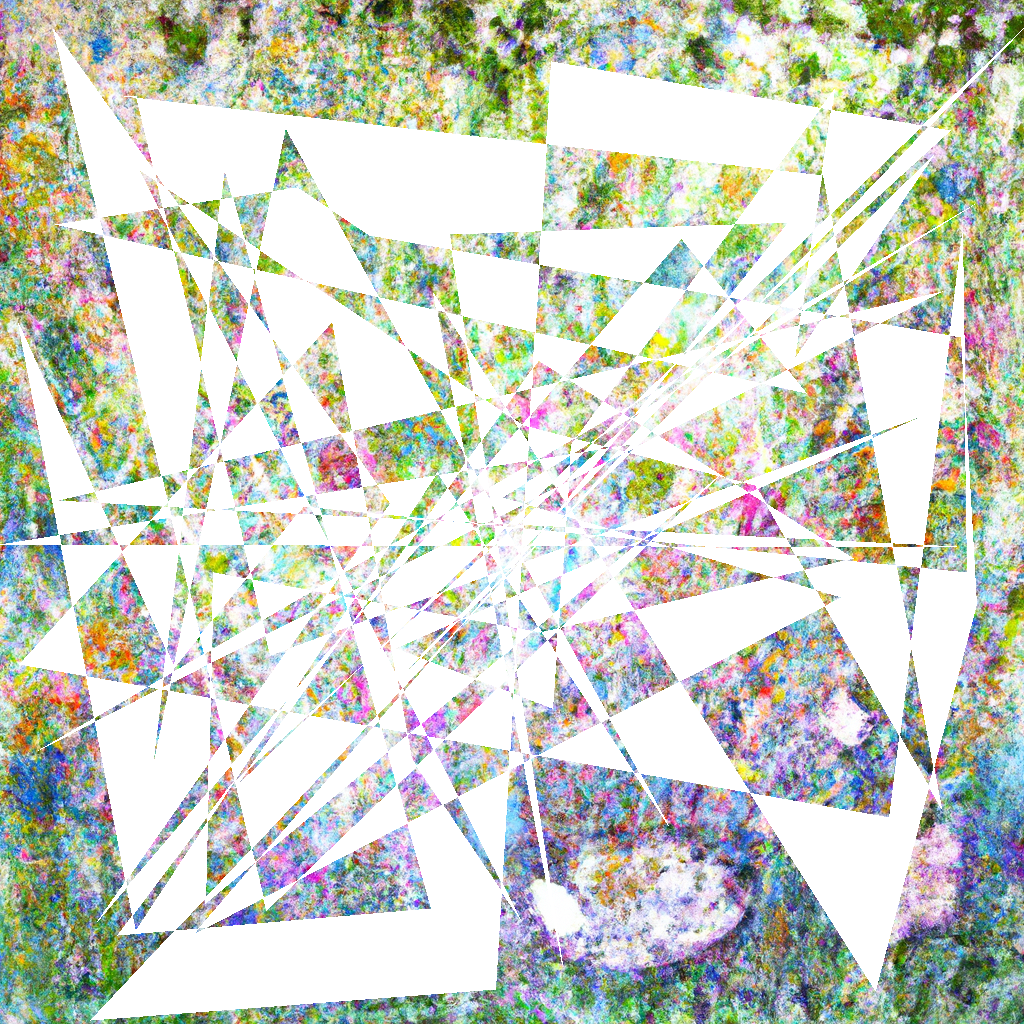

In [12]:
random_shape_img(image_path=image_path)

In [2]:
from PIL import Image, ImageDraw

def symm_triangle_crop(image_path):
    # Open the image and convert it to RGBA mode (if it's not already)
    image = Image.open(image_path).convert("RGBA")
    width, height = image.size

    if width != height:
        raise ValueError("The input image should be square.")

    # Create a new image with the same size and RGBA mode
    mask = Image.new("RGBA", (width, height))

    # Draw a filled white triangle on the mask image
    draw = ImageDraw.Draw(mask)
    triangle_points = [(0, height), (width, height), (width // 2, 0)]
    draw.polygon(triangle_points, fill=(255, 255, 255, 255))

    # Apply the mask to the original image
    result = Image.new("RGBA", (width, height), (0, 0, 0, 0))
    result.paste(image, mask=mask)

    return result

# Usage example:
input_image_path = "C:/Users/trent/OneDrive/Documents/GitHub/ai_art_creation/ai_art_creation/image_processing/images_raw/2023-03-23_21-11-39.png"
output_image_path = "C:/Users/trent/OneDrive/Documents/GitHub/ai_art_creation/ai_art_creation/image_processing/images_raw/2023-03-23_21-11-39-triangle.png"

result_image = symm_triangle_crop(input_image_path)
result_image.save(output_image_path)


In [4]:
from PIL import Image, ImageDraw

def circle_crop(image_path):
    # Open the image and convert it to RGBA mode (if it's not already)
    image = Image.open(image_path).convert("RGBA")
    width, height = image.size

    if width != height:
        raise ValueError("The input image should be square.")

    # Create a new image with the same size and RGBA mode
    mask = Image.new("RGBA", (width, height))

    # Draw a filled white circle on the mask image
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0, width, height), fill=(255, 255, 255, 255))

    # Apply the mask to the original image
    result = Image.new("RGBA", (width, height), (0, 0, 0, 0))
    result.paste(image, mask=mask)

    return result

# Usage example:
input_image_path = "C:/Users/trent/OneDrive/Documents/GitHub/ai_art_creation/ai_art_creation/image_processing/images_raw/2023-03-23_21-11-39.png"
output_image_path = "C:/Users/trent/OneDrive/Documents/GitHub/ai_art_creation/ai_art_creation/image_processing/images_raw/2023-03-23_21-11-39-circle.png"

result_image = circle_crop(input_image_path)
result_image.save(output_image_path)


In [15]:
from PIL import Image, ImageDraw

def rounded_corners_crop(image_path, radius_percentage=0.2):
    # Open the image and convert it to RGBA mode (if it's not already)
    image = Image.open(image_path).convert("RGBA")
    width, height = image.size

    if width != height:
        raise ValueError("The input image should be square.")

    # Calculate the corner radius based on the percentage of image width
    corner_radius = int(width * radius_percentage)

    # Create a new image with the same size and RGBA mode
    mask = Image.new("RGBA", (width, height))

    # Draw a rounded rectangle on the mask image
    draw = ImageDraw.Draw(mask)
    draw.rounded_rectangle((0, 0, width, height), radius=corner_radius, fill=(255, 255, 255, 255))

    # Apply the mask to the original image
    result = Image.new("RGBA", (width, height), (0, 0, 0, 0))
    result.paste(image, mask=mask)

    return result

# Usage example:
input_image_path = "C:/Users/trent/OneDrive/Documents/GitHub/ai_art_creation/ai_art_creation/image_processing/images_raw/2023-03-23_21-11-39.png"
output_image_path = "C:/Users/trent/OneDrive/Documents/GitHub/ai_art_creation/ai_art_creation/image_processing/images_raw/2023-03-23_21-11-39-rounded.png"

result_image = rounded_corners_crop(input_image_path)
result_image.save(output_image_path)

In [25]:
import os
from PIL import Image, ImageDraw
import random
import math

def random_triangle_crop(image_path):
    # Check if the file exists
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"File not found: {image_path}")

    # Open the image file
    img = Image.open(image_path)

    # Check if the image is square
    if img.width != img.height:
        raise ValueError("Image must be square")

    # Get the size of the image
    size = img.width

    # Calculate minimum area for the triangle
    min_area = 0.25 * size * size
    
    # Create a list of integers
    sides = [1, 2, 3, 4]

    # Shuffle the list randomly
    random.shuffle(sides)

    # Take the first three elements from the shuffled list
    sides = sides[:3]

    # Generate triangle points that cover at least 25% of the image
    while True:
        if 1 not in sides:
            p1 = (random.randint(0, size), 0)
            p2 = (0, random.randint(0, size))
            p3 = (random.randint(0, size), size)
        if 2 not in sides:
            p1 = (size, random.randint(0, size))
            p2 = (0, random.randint(0, size))
            p3 = (random.randint(0, size), size)
        if 3 not in sides:
            p1 = (random.randint(0, size), 0)
            p2 = (size, random.randint(0, size))
            p3 = (random.randint(0, size), size)
        if 4 not in sides:
            p1 = (random.randint(0, size), 0)
            p2 = (0, random.randint(0, size))
            p3 = (size, random.randint(0, size))

        # Calculate the area of the generated triangle using the Shoelace formula
        area = 0.5 * abs(p1[0]*p2[1] + p2[0]*p3[1] + p3[0]*p1[1] - p2[0]*p1[1] - p3[0]*p2[1] - p1[0]*p3[1])
        
        if area >= min_area:
            break

    # Create a new image with the same size and mode as the input image
    output_image = Image.new(img.mode, (size, size), (0, 0, 0, 0))

    # Create a draw object to draw the triangle on the new image
    draw = ImageDraw.Draw(output_image, "RGBA")

    # Draw the triangle with a fully opaque color
    draw.polygon([p1, p2, p3], fill=(255, 255, 255, 255))

    # Create a mask from the triangle image
    mask = Image.new("L", (size, size), 0)
    mask.paste(output_image.split()[-1])

    # Apply the mask to the input image
    img.putalpha(mask)

    # Return the modified image
    return img

# Usage example:
input_image_path = "C:/Users/trent/OneDrive/Documents/GitHub/ai_art_creation/ai_art_creation/image_processing/images_raw/2023-03-23_21-11-39.png"
output_image_path = "C:/Users/trent/OneDrive/Documents/GitHub/ai_art_creation/ai_art_creation/image_processing/images_raw/2023-03-23_21-11-39-randtri.png"

result_image = random_triangle_crop(input_image_path)
result_image.save(output_image_path)

In [12]:
import math
from PIL import Image, ImageDraw
import random as rand

def random_polygon_crop(image_path):
    num_sides = rand.randint(5, 99)

    # Open the image and convert it to RGBA mode (if it's not already)
    image = Image.open(image_path).convert("RGBA")
    width, height = image.size

    if width != height:
        raise ValueError("The input image should be square.")

    # Create a new image with the same size and RGBA mode
    mask = Image.new("RGBA", (width, height))

    # Draw a filled white polygon on the mask image
    draw = ImageDraw.Draw(mask)
    polygon_points = [
        (
            random.randint(0, width),
            random.randint(0, height)
        )
        for i in range(num_sides)
    ]
    draw.polygon(polygon_points, fill=(255, 255, 255, 255))

    # Apply the mask to the original image
    result = Image.new("RGBA", (width, height), (0, 0, 0, 0))
    result.paste(image, mask=mask)

    return result
    
# Usage example:
input_image_path = "C:/Users/trent/OneDrive/Documents/GitHub/ai_art_creation/ai_art_creation/image_processing/images_raw/2023-03-23_21-11-39.png"
output_image_path = "C:/Users/trent/OneDrive/Documents/GitHub/ai_art_creation/ai_art_creation/image_processing/images_raw/2023-03-23_21-11-39-randpoly.png"

result_image = random_polygon_crop(input_image_path)
result_image.save(output_image_path)

In [39]:
import random
from PIL import Image, ImageDraw
import numpy as np

def random_polygon_crop_circle(image_path):
    # Load the image
    image = Image.open(image_path).convert("RGBA")

    # Check if the image is square
    if image.width != image.height:
        raise ValueError("The input image must be square")

    size = image.width
    radius = size / 2

    # Generate a random number of points between 5 and 99
    n_points = random.randint(250, 1000)

    # Generate random points within the circle
    points = []
    while len(points) < n_points:
        x = random.uniform(0, size)
        y = random.uniform(0, size)
        if (x - radius) ** 2 + (y - radius) ** 2 <= radius ** 2:
            points.append((x, y))

    # Create a new transparent image with the same size
    mask = Image.new("RGBA", (size, size), 0)
    draw = ImageDraw.Draw(mask)

    # Draw the polygon on the mask
    draw.polygon(points, fill=(255, 255, 255, 255))

    # Convert mask to RGBA
    mask = mask.convert("RGBA")

    # Apply the mask to the original image
    #result = Image.composite(image, Image.new("RGBA", image.size, (0, 0, 0, 0)), mask)

    # Apply the mask to the original image
    result = Image.new("RGBA", (size, size), (0, 0, 0, 0))
    result.paste(image, mask=mask)


    # Save the result to a new file
    #output_path = "output_" + image_path
    #result.save(output_path, "PNG")

    return result

# Usage example:
#input_image_path = "C:/Users/trent/OneDrive/Documents/GitHub/ai_art_creation/ai_art_creation/image_processing/images_raw/2023-03-23_21-11-39.png"
#output_image_path = "C:/Users/trent/OneDrive/Documents/GitHub/ai_art_creation/ai_art_creation/image_processing/images_raw/2023-03-23_21-11-39-randpolycircle.png"
input_image_path = "C:/Users/trent/OneDrive/Documents/GitHub/ai_art_creation/ai_art_creation/image_processing/images_processed/archive/2023-03-22_22-19-08-scaled.png"
output_image_path = "C:/Users/trent/OneDrive/Documents/GitHub/ai_art_creation/ai_art_creation/image_processing/images_processed/archive/2023-03-22_22-19-08-scaled-randpolycircle.png"

result_image = random_polygon_crop_circle(input_image_path)
result_image.save(output_image_path)

In [ ]:
"C:\Users\trent\OneDrive\Documents\GitHub\ai_art_creation\ai_art_creation\image_processing\images_processed\archive\2023-03-23_22-34-01-scaled.png"